In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from pandas.tools.plotting import scatter_matrix
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

In [9]:
datos=pd.read_csv('bank-additional-full.csv', sep = ';') #importamos el archivo

In [10]:
datos.shape

(41188, 21)

In [11]:
datos#visualizamos dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [12]:
var_obj=datos['y']#le llamamos var_obj a la columna y

In [13]:
var_obj = var_obj.replace('no', 'True')#convertimos var_obj en binario
var_obj = var_obj.replace('yes', 'False')

var_obj = var_obj.replace('True', 0)
var_obj = var_obj.replace('False', 1)

In [14]:
datos#comprobacion

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [15]:
datos=datos.drop(['y'], axis=1)# sacamos la variable y de nuestro dataset(ya no nos sirve)

In [16]:
datos['var_obj'] = var_obj

In [17]:
pd.set_option('display.max_columns',None)#Sin esto no se ven todas las columnas
datos

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,var_obj
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [18]:
datos.isnull().sum()#comprobamos a ver si hay NA. NO HAY

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
var_obj           0
dtype: int64

In [19]:
def proporciones_final (var,target,df):

    proporcion = pd.DataFrame()
    
    proporcion['%depositos'] = df[target].groupby(df[var]).mean()*100
    proporcion['Conteo'] = df[target].groupby(df[var]).count()
    proporcion= proporcion.round(3)   
    proporcion_filtered = proporcion[(proporcion['%depositos']>0) & (proporcion['Conteo']>10)]
        
    if len(proporcion_filtered)<100 and len(proporcion_filtered)>1:
        fig = plt.figure()
        ax = proporcion_filtered['Conteo'].plot(kind='bar',grid=True)
                
        ax2 = ax.twinx()
        ax2.plot(proporcion_filtered['%depositos'].values, linestyle='-', linewidth=2.0,color='g')
        plt.tight_layout()        
    else:        
        proporcion_filtered.reset_index(inplace=True)
        sns.lmplot(x = var,y ='%depositos',data=proporcion_filtered, fit_reg=True,ci=None)

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


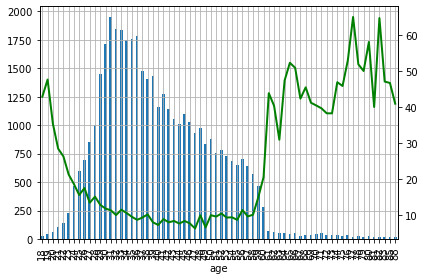

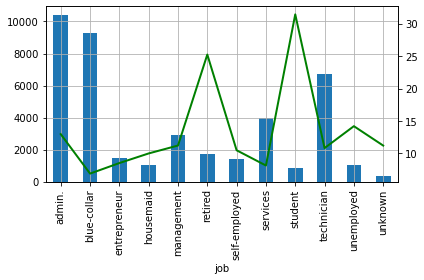

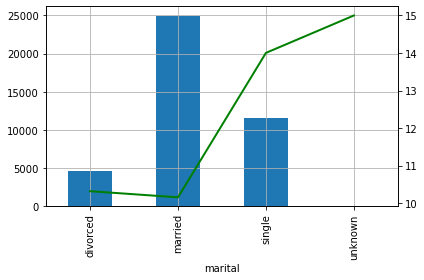

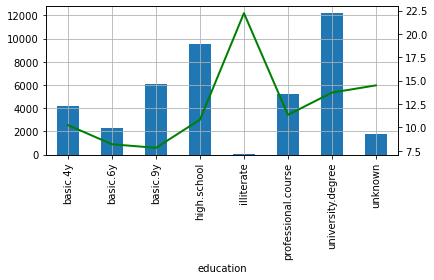

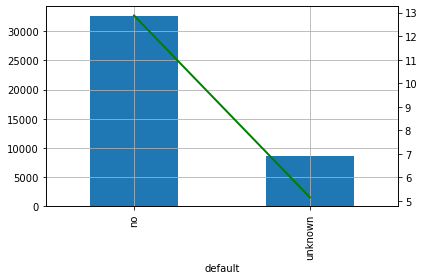

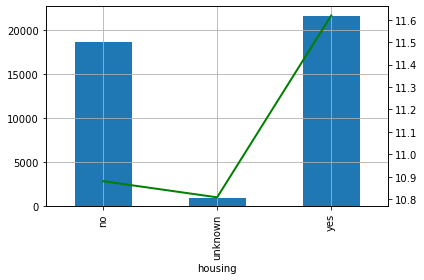

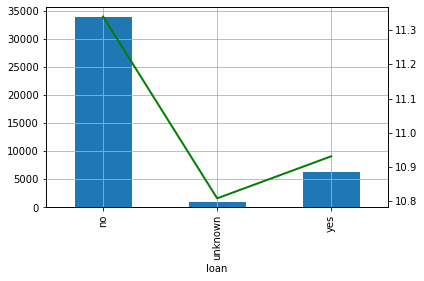

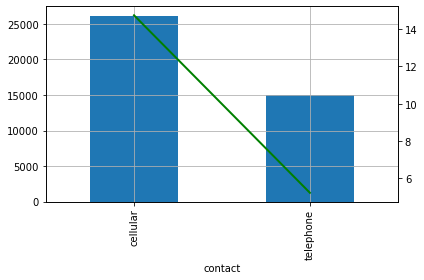

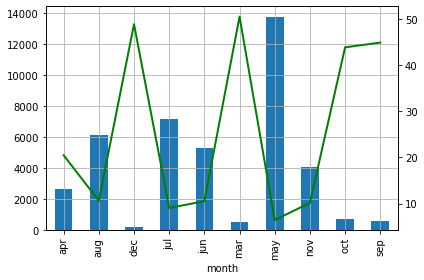

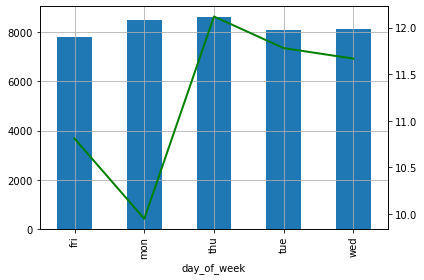

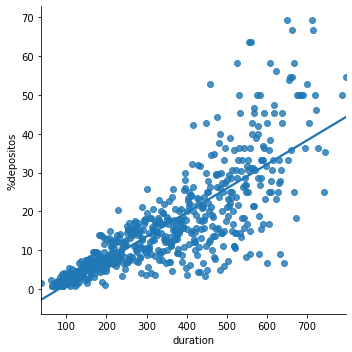

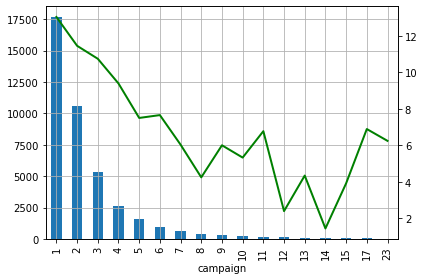

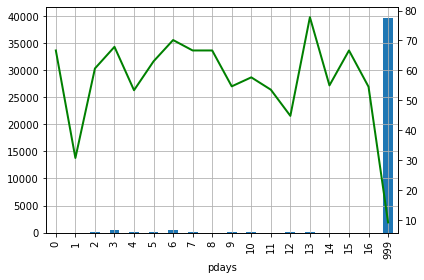

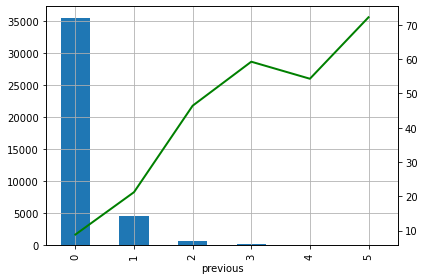

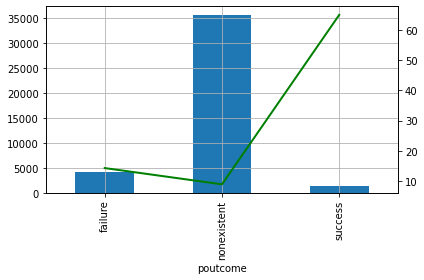

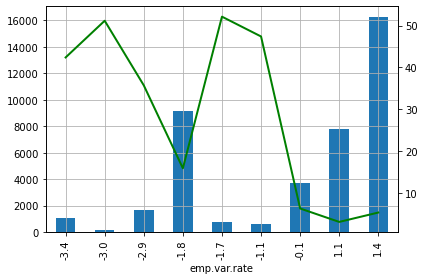

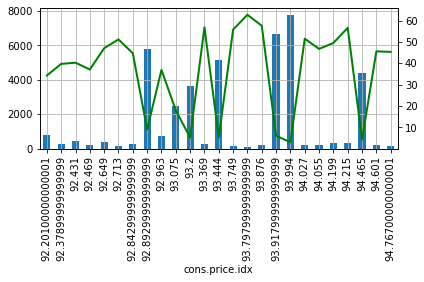

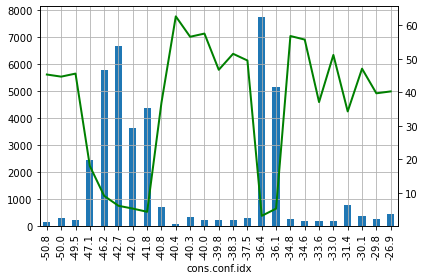

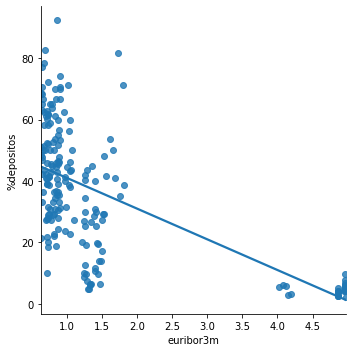

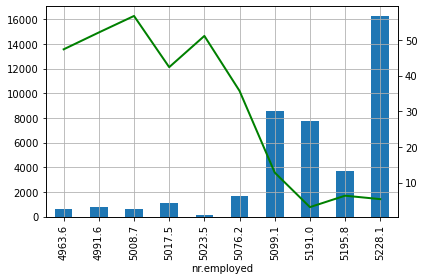

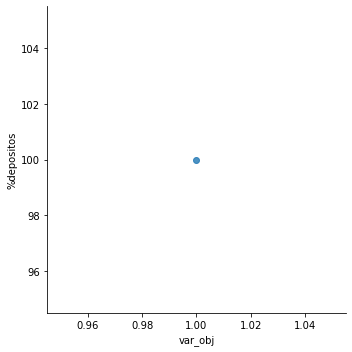

In [20]:
for i in datos.columns:
    proporciones_final (i, 'var_obj', datos)

In [21]:
#VAMOS A ANALIZAR LA DISTRIBUCION DE LAS VARIABLES CON EL VALUE COUNTS DE CADA UNO Y UN GRAFIQUITO Y COMENTAREMOS COSILLAS
#SE VIENEN COSITAS RICAS...

pd.set_option('display.max_rows',None)#sin esto no se ven todas las filas
datos['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
55     648
57     646
25     598
58     576
59     463
24     463
60     283
23     226
22     137
21     102
61      73
20      65
62      62
66      57
64      57
63      55
71      53
70      47
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      28
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, dtype: int64

In [22]:
# JOB
datos['job'].value_counts()

# 330 Unknown, estos se podrían reclasificar o incluso dejarla conmo Unknown
# Hemos visto que en otras variables también hay, vamos a hacer el análisis de estos y a ver que sale en el resto

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [23]:
datos.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
var_obj             int64
dtype: object

In [24]:
# MARITAL
datos['marital'].value_counts()

# Aquí los Unknown no son represantivos

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [25]:
# EDUCATION
datos['education'].value_counts()



university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [26]:
# DEFAULT
datos['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [27]:
# HOUSING
datos['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [28]:
# LOAN
datos['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [29]:
# CONTACT
datos['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [30]:
# MONTH
datos['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [31]:
# DAY_OF_WEEK
datos['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [32]:
# DURATION
datos['duration'].value_counts()

# Duración de la llamada en segundos, si es 0 es decisivo para la variable y, esta variable habria que descartarla si queremos
# hacer predicción (dicho en la descripción)
# Lo podemos utilizar como una continua o tramearla

85      170
90      170
136     168
73      167
124     164
87      162
72      161
104     161
111     160
106     159
109     158
97      158
122     157
135     156
92      156
114     156
139     155
96      155
119     155
82      154
89      153
76      153
71      152
126     152
125     152
93      151
107     150
88      150
83      149
123     149
95      148
80      148
103     147
81      147
67      147
91      147
128     147
77      146
127     146
78      145
100     145
105     145
101     145
157     145
140     145
98      144
112     144
133     143
166     142
110     142
130     142
113     142
121     141
102     141
68      140
159     140
64      139
75      138
79      138
160     137
108     137
144     137
129     136
165     136
154     136
74      136
94      136
155     136
115     135
117     134
131     134
134     133
150     133
143     133
147     131
59      131
168     131
118     131
84      131
69      130
145     130
164     130
99      129
151 

In [33]:
# CAMPAIGN
datos['campaign'].value_counts()

# Número de contactos que se han realzado a cada posible cliente
# Tramear a partir de cierto número no significativo

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

In [34]:
# PDAYS
datos['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [35]:
# PREVIOUS
datos['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [36]:
# emp.var.rate
datos['emp.var.rate'].value_counts()

# la variación de los empleados trimestralmente

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [37]:
# POUTCOME
datos['poutcome'].value_counts()

# Si se la anterior campaña funciono

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [38]:
#CONS.PRICE.IDX
datos['cons.price.idx'].value_counts()

# Un índice, tendremos que ver bien que significa
# indice de precio al consumo mensual

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

In [39]:
# CONS.CONF.IDX
datos['cons.conf.idx'].value_counts()

#Igual que la anterior
# índice de confianza del consumidor mensual

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

In [40]:
#EURIBOR3M
datos['euribor3m'].value_counts()

# Continua, podemos ver si tramearla pero puede funcionar dejarla igual

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
4.964    1175
1.405    1169
4.965    1071
4.864    1044
4.960    1013
4.968     992
4.959     895
4.860     892
4.855     840
4.076     822
1.266     820
4.859     788
4.120     756
4.858     733
4.153     690
4.021     676
4.967     643
1.281     637
4.966     622
4.191     610
1.250     587
4.958     581
1.291     544
1.327     538
4.957     537
1.299     520
1.313     492
1.334     482
1.244     422
1.344     395
4.865     373
4.866     340
1.365     303
1.410     254
1.260     252
1.354     215
0.879     180
4.970     172
1.262     145
0.714     139
0.715     135
0.884     128
0.883     124
1.270     110
4.955     103
1.445     103
4.947      98
1.415      98
1.268      95
1.423      87
1.264      87
0.873      82
0.739      82
1.453      81
1.435      81
0.881      79
0.720      78
0.722      74
1.259      70
0.742      68
0.861      65
1.479      62
0.904      60
1.466      57
0.869      54
0.716      54
0.899 

In [41]:
# NR.EMPLOYED
datos['nr.employed'].value_counts()

# número de empleados menos índicador trimestral, ratio de número de empleados por trimestre

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [42]:
datos.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,var_obj
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [43]:
# Pasamos las variables categóricas a numéricas

datos_tratado=datos

datos_tratado.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                      (1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

datos_tratado.default.replace(('unknown','yes','no'),(0,1,2),inplace=True)

datos_tratado.housing.replace(('unknown','yes','no'),(0,1,2),inplace=True)

datos_tratado.loan.replace(('unknown','yes','no'),(0,1,2),inplace=True)

datos_tratado.education.replace(('unknown','university.degree','high.school','basic.9y',
                                 'professional.course','basic.4y','basic.6y','illiterate'),
                                (0,1,2,3,4,5,6,7),inplace=True)

datos_tratado.job.replace(('unknown','admin.','blue-collar','technician',
                            'services','management','retired','entrepreneur',
                           'self-employed','housemaid','unemployed','student'),
                                (0,1,2,3,4,5,6,7,8,9,10,11),inplace=True)

datos_tratado.marital.replace(('unknown','married','single','divorced'),(0,1,2,3),inplace=True)

datos_tratado.contact.replace(('cellular','telephone'),(1,2),inplace=True)

datos_tratado.day_of_week.replace(('mon','tue','wed','thu','fri'),(1,2,3,4,5), inplace = True)

datos_tratado.poutcome.replace(('nonexistent','failure','success'),(1,2,3),inplace=True)

In [44]:
datos_tratado.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,var_obj
0,56,9,1,5,2,2,2,2,5,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,4,1,2,0,2,2,2,5,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,4,1,2,2,1,2,2,5,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,1,6,2,2,2,2,5,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,4,1,2,2,2,1,2,5,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [45]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)  

In [46]:
#Separamos el dataset en train y test
#Quitamos var_obj también
datos_tratado=datos_tratado.drop(['var_obj'], axis=1)
X_train, X_test, y_train, y_test = train_test_split( datos_tratado,
                                                    var_obj,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = var_obj)

## 1. XGBoost

Wall time: 0 ns


C:\Users\Alex\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
matriz de confusión
[[7059  251]
 [ 405  523]]
accuracy
0.9203690216071863
precision
0.6757105943152455
recall
0.5635775862068966
f1
0.6145710928319624
AUC
0.7646205304495496


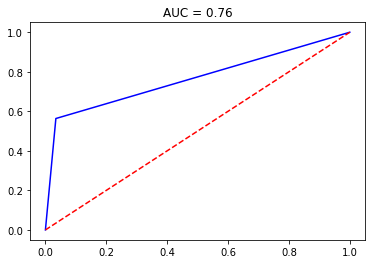

In [47]:
%time
model = XGBClassifier()
clf = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
saca_metricas(y_test, y_pred)

## 2. RandomForest

matriz de confusión
[[7293   17]
 [ 816  112]]
accuracy
0.8988832240835154
precision
0.8682170542635659
recall
0.1206896551724138
f1
0.2119205298013245
AUC
0.5591820368885324


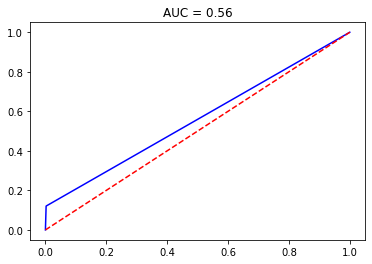

In [55]:
model2 = RandomForestClassifier(max_depth=2, random_state=0)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)
saca_metricas(y_test, y_pred)
